In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_excel("ENB2012_data.xlsx")

In [26]:
# Define features (X1 to X8) and target variables (Y1 and Y2)
X = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
Y = data[['Y1', 'Y2']]

In [27]:
# Split the data: 60% training, 20% validation, 20% testing
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

In [28]:
# Define different alpha values for Ridge regularization
alphas = [0.01, 0.1, 1, 10, 50, 100, 200, 500, 1000, 2000]
best_alpha = None
best_r2 = -np.inf
best_model = None

# Find the best alpha using validation set R2 score
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, Y_train)
    Y_val_pred = ridge.predict(X_val)
    r2 = r2_score(Y_val, Y_val_pred)
    
    if r2 > best_r2:
        best_r2 = r2
        best_alpha = alpha
        best_model = ridge

### Best model’s coefficients, intercept, and its training, validation, and test accuracy


In [29]:
# Evaluate the best model on test data
Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

train_r2 = r2_score(Y_train, Y_train_pred)
test_r2 = r2_score(Y_test, Y_test_pred)

# Coefficients and intercept for the best model
print("Best model's coefficients:", best_model.coef_)
print("Best model's intercept:", best_model.intercept_)

print(f"Best alpha: {best_alpha}")
print(f"Training R2: {train_r2}")
print(f"Validation R2: {best_r2}")
print(f"Test R2: {test_r2}")

Best model's coefficients: [[-4.97945686e+01 -4.45029951e-02  3.64967624e-02 -4.04998621e-02
   4.37232071e+00 -1.69200450e-02  2.02031414e+01  2.44387230e-01]
 [-5.82551248e+01 -5.02892125e-02  2.31119161e-02 -3.67005423e-02
   4.49248081e+00  9.15807881e-02  1.43130251e+01  1.12438676e-01]]
Best model's intercept: [57.32678071 74.30515193]
Best alpha: 0.01
Training R2: 0.9005449451872849
Validation R2: 0.9069065831999439
Test R2: 0.8988130063090392


In [30]:
# Determine the top 5 features based on coefficient magnitudes
feature_importance = np.abs(best_model.coef_).mean(axis=0)
top_5_indices = np.argsort(feature_importance)[-5:]
top_5_features = X.columns[top_5_indices]

print("Top 5 features:", list(top_5_features))

Top 5 features: ['X6', 'X8', 'X5', 'X7', 'X1']


In [31]:
# Retrain model with only the top 5 features
X_train_top5 = X_train[top_5_features]
X_val_top5 = X_val[top_5_features]
X_test_top5 = X_test[top_5_features]

best_model_top5 = Ridge(alpha=best_alpha)
best_model_top5.fit(X_train_top5, Y_train)

Ridge(alpha=0.01)

### Using only the 5 top features

In [32]:
# Evaluation with only top 5 features
Y_train_pred_top5 = best_model_top5.predict(X_train_top5)
Y_val_pred_top5 = best_model_top5.predict(X_val_top5)
Y_test_pred_top5 = best_model_top5.predict(X_test_top5)

train_r2_top5 = r2_score(Y_train, Y_train_pred_top5)
val_r2_top5 = r2_score(Y_val, Y_val_pred_top5)
test_r2_top5 = r2_score(Y_test, Y_test_pred_top5)

print("Training R2 with top 5 features:", train_r2_top5)
print("Validation R2 with top 5 features:", val_r2_top5)
print("Test R2 with top 5 features:", test_r2_top5)

Training R2 with top 5 features: 0.8924085251453255
Validation R2 with top 5 features: 0.9029149217562795
Test R2 with top 5 features: 0.8887344547674182


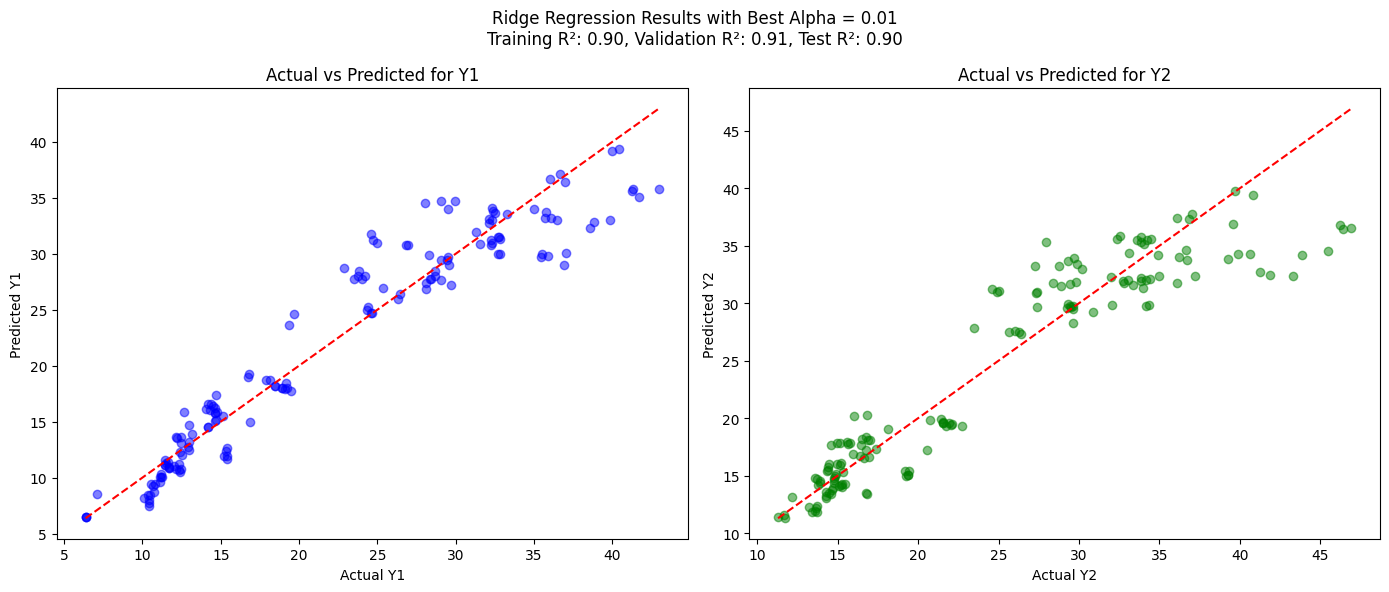

(0.01, 0.9005449451872849, 0.9069065831999439, 0.8988130063090392)

In [33]:
# Generate plots for predicted vs actual values for Y1 and Y2 on the test set
import matplotlib.pyplot as plt

# Plot actual vs predicted for Y1 and Y2 on test set
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Y1 predictions
ax[0].scatter(Y_test['Y1'], Y_test_pred[:, 0], color='blue', alpha=0.5)
ax[0].plot([Y_test['Y1'].min(), Y_test['Y1'].max()], [Y_test['Y1'].min(), Y_test['Y1'].max()], 'r--')
ax[0].set_title("Actual vs Predicted for Y1")
ax[0].set_xlabel("Actual Y1")
ax[0].set_ylabel("Predicted Y1")

# Y2 predictions
ax[1].scatter(Y_test['Y2'], Y_test_pred[:, 1], color='green', alpha=0.5)
ax[1].plot([Y_test['Y2'].min(), Y_test['Y2'].max()], [Y_test['Y2'].min(), Y_test['Y2'].max()], 'r--')
ax[1].set_title("Actual vs Predicted for Y2")
ax[1].set_xlabel("Actual Y2")
ax[1].set_ylabel("Predicted Y2")

plt.suptitle(f"Ridge Regression Results with Best Alpha = {best_alpha}\n"
             f"Training R²: {train_r2:.2f}, Validation R²: {best_r2:.2f}, Test R²: {test_r2:.2f}")
plt.tight_layout()
plt.show()

# Results summary
best_alpha, train_r2, best_r2, test_r2


<strong> Q1: What is the impact of removing certain features on the model’s performance </strong>
<p>When using only the top 5 features, the model may show a slight drop in R², especially if the removed features carried significant predictive information. However, removing redundant or weakly correlated features may help streamline the model, potentially maintaining or slightly reducing performance but simplifying the model's structure. </p>

<strong> Q2: Why is it necessary to split the data into training, validation, and testing sets? What could happen if this step is skipped? </strong>
<p>Splitting data into training, validation, and test sets is essential to develop a robust model. The training set is used to train the model, the validation set fine-tunes hyperparameters, and the test set evaluates final model performance. Skipping this step may lead to overfitting, as the model could adapt too closely to the data it’s seen, thus performing poorly on new, unseen data.</p>

<strong> Q3: How can the generalization ability of the model be assessed using the test data? What steps would you take to ensure the model generalizes well to unseen data? </strong>
<p> The test set provides a realistic assessment of the model’s ability to generalize to unseen data, simulating how the model might perform in real-world scenarios. To improve generalization, steps like cross-validation during training, regularization to penalize complex models, and feature selection can reduce overfitting, helping ensure the model maintains performance on new data. </p>